In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NLTK Data Paths: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/content/nltk_data', '/content/nltk_data', '/content/nltk_data', '/content/nltk_data', '/content/nltk_data', '/content/nltk_data']


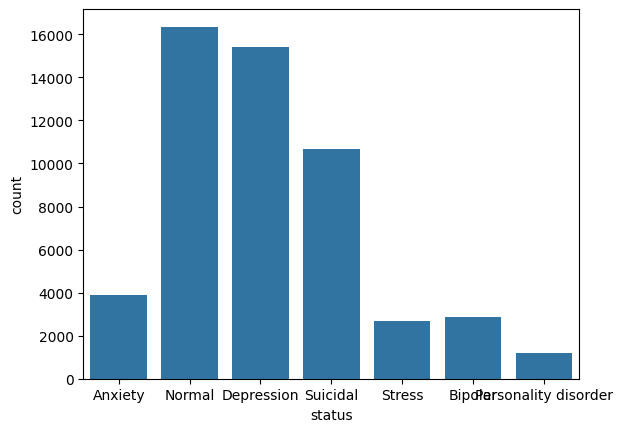

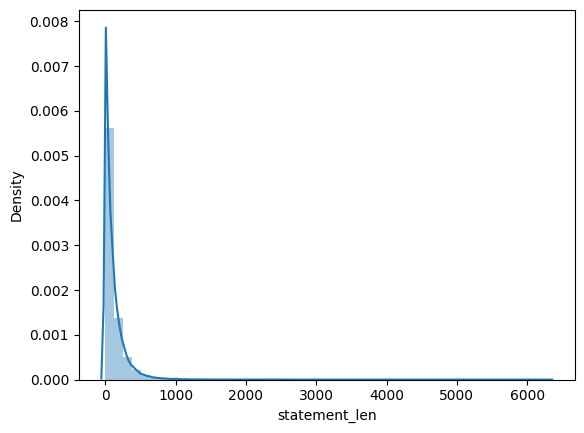

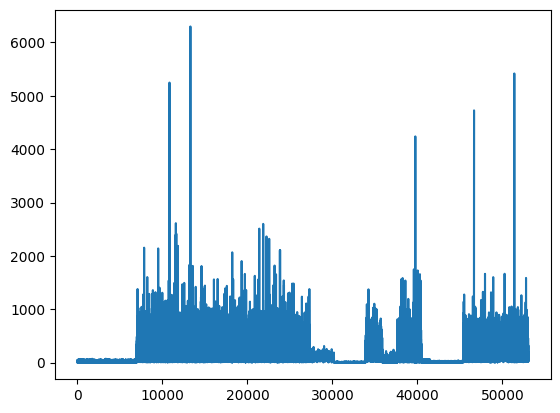

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   statement      52681 non-null  object
 1   status         52681 non-null  object
 2   statement_len  52681 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
                      precision    recall  f1-score   support

             Anxiety       0.82      0.81      0.82       371
             Bipolar       0.82      0.80      0.81       273
          Depression       0.71      0.68      0.69      1521
              Normal       0.89      0.94      0.92      1655
Personality disorder       0.81      0.70      0.75       114
              Stress       0.63      0.60      0.62       258
            Suicidal       0.64      0.64      0.64      1077

            accuracy                           0.77      5269
           macro avg       0.76      0.74      0.75      5269
        we

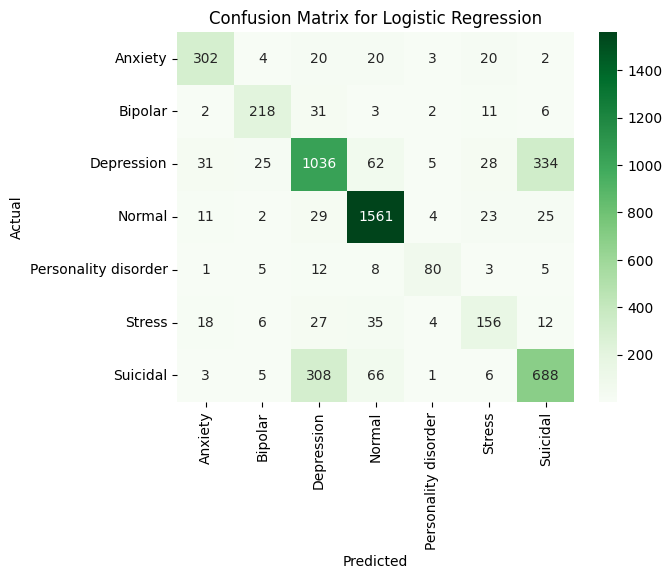

Map:   0%|          | 0/47412 [00:00<?, ? examples/s]

Map:   0%|          | 0/5269 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.588900,0.584265,0.764092,0.771937,0.764092,0.761501
2,0.525600,0.551171,0.783071,0.782513,0.783071,0.782410


Evaluation metrics: {'eval_loss': 0.5511708855628967, 'eval_accuracy': 0.7830707914215221, 'eval_precision': 0.7825128328331723, 'eval_recall': 0.7830707914215221, 'eval_f1': 0.7824099310510885, 'eval_runtime': 18.5153, 'eval_samples_per_second': 284.576, 'eval_steps_per_second': 17.823, 'epoch': 2.0}
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       384
           1       0.82      0.78      0.80       278
           2       0.74      0.72      0.73      1541
           3       0.92      0.93      0.92      1634
           4       0.65      0.56      0.60       108
           5       0.64      0.58      0.60       259
           6       0.66      0.70      0.68      1065

    accuracy                           0.78      5269
   macro avg       0.75      0.73      0.74      5269
weighted avg       0.78      0.78      0.78      5269



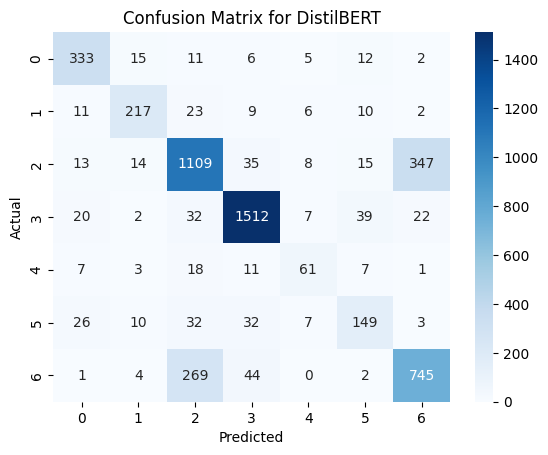

In [ ]:
# Install necessary libraries
!pip install datasets

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

import re
import string
import random
from imblearn.over_sampling import SMOTE, RandomOverSampler
from scipy.sparse import hstack
from wordcloud import WordCloud

# Download and configure NLTK for tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print("NLTK Data Paths:", nltk.data.path)  # Verify NLTK paths

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer

# Import machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline

import warnings
warnings.filterwarnings("ignore")

# =========================
# 1) Data Reading and Initial Exploration
# =========================
df = pd.read_csv('Combined Data.csv', index_col=0)
df.head()

# Check for missing values
df.isnull().sum()

# Visualize the distribution of the "status" column
sns.countplot(data=df, x='status')
plt.show()

# Drop missing values
df1 = df.copy()
df1.dropna(inplace=True)
df1.head()

# Verify that missing values are removed
df1.isnull().sum()

# Add a new column to calculate the number of words in each statement
df1['statement_len'] = df1['statement'].apply(lambda x: len(x.split(' ')))
df1.head()

# Visualize the distribution of statement lengths
sns.distplot(df1['statement_len'])
plt.show()

plt.plot(df1['statement_len'])
plt.show()

df1.info()

# =========================
# 2) Text Cleaning and Preprocessing
# =========================
def clean_text(text):
    """
    Clean text by making it lowercase, removing patterns, links,
    punctuation, numbers, and extra spaces.
    """
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Apply cleaning to statements
df2 = df1.copy()
df2['statement_clean'] = df2['statement'].apply(clean_text)
df2.head()

# Remove stopwords
stop_words = stopwords.words('english')
additional_stopwords = ['u', 'im', 'c']
stop_words = stop_words + additional_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df2['statement_clean'] = df2['statement_clean'].apply(remove_stopwords)
df2.head()

# Apply stemming
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df2['statement_clean'] = df2['statement_clean'].apply(stemm_text)
df2.head()

# Encode the target labels
l_encoder = LabelEncoder()
l_encoder.fit(df2['status'])

df2['status_encoded'] = l_encoder.transform(df2['status'])
df2.head()

# Tokenize the cleaned text
df2['tokens'] = df2['statement_clean'].apply(word_tokenize)
df2.head()

# =========================
# 3) Traditional Model: CountVectorizer + Logistic Regression
# =========================
X = df2['statement_clean']
y = df2['status_encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Convert text to numeric features using CountVectorizer
c_vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    max_df=0.7,
    max_features=50_000
)
c_vectorizer.fit(X_train)

X_train_dtm = c_vectorizer.transform(X_train)
X_test_dtm = c_vectorizer.transform(X_test)

# Oversample the minority classes using RandomOverSampler
r_oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = r_oversampler.fit_resample(X_train_dtm, y_train)

# Train a Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = lr_clf.predict(X_test_dtm)
labels = l_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=labels))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# =========================
# 4) Transformer Model: Fine-tuning DistilBERT
# =========================
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import os
os.environ["WANDB_DISABLED"] = "true"  # Disable Weights & Biases logging

# Prepare the data for Hugging Face Transformers
df_bert = df2[['statement_clean', 'status_encoded']].rename(
    columns={'statement_clean': 'text', 'status_encoded': 'label'}
)

train_df_bert, test_df_bert = train_test_split(
    df_bert, test_size=0.1, random_state=42, stratify=df_bert['label']
)

train_dataset_hf = Dataset.from_pandas(train_df_bert)
test_dataset_hf = Dataset.from_pandas(test_df_bert)

# Tokenize the text using DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_function(example):
    return tokenizer(
        example['text'],
        truncation=True,
        padding='max_length',
        max_length=128
    )

train_dataset_hf = train_dataset_hf.map(tokenize_function, batched=True)
test_dataset_hf = test_dataset_hf.map(tokenize_function, batched=True)

train_dataset_hf = train_dataset_hf.remove_columns(["text"])
test_dataset_hf = test_dataset_hf.remove_columns(["text"])
train_dataset_hf.set_format("torch")
test_dataset_hf.set_format("torch")

# Define the model
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(df2['status'].unique())
)

# Set training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=50,
    save_steps=200,
    seed=42
)

# Define evaluation metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_hf,
    eval_dataset=test_dataset_hf,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()
print("Evaluation metrics:", eval_result)

# Generate predictions
predictions = trainer.predict(test_dataset_hf)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=-1)

# Display classification results
print("Classification Report:")
print(classification_report(y_true, y_pred))
conf_mat = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DistilBERT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
